In [1]:
import numpy as np
import pandas as pd

pd_data = pd.read_csv("weatherAUS.csv")

# 1. The interaction between different factors of different time in a day.

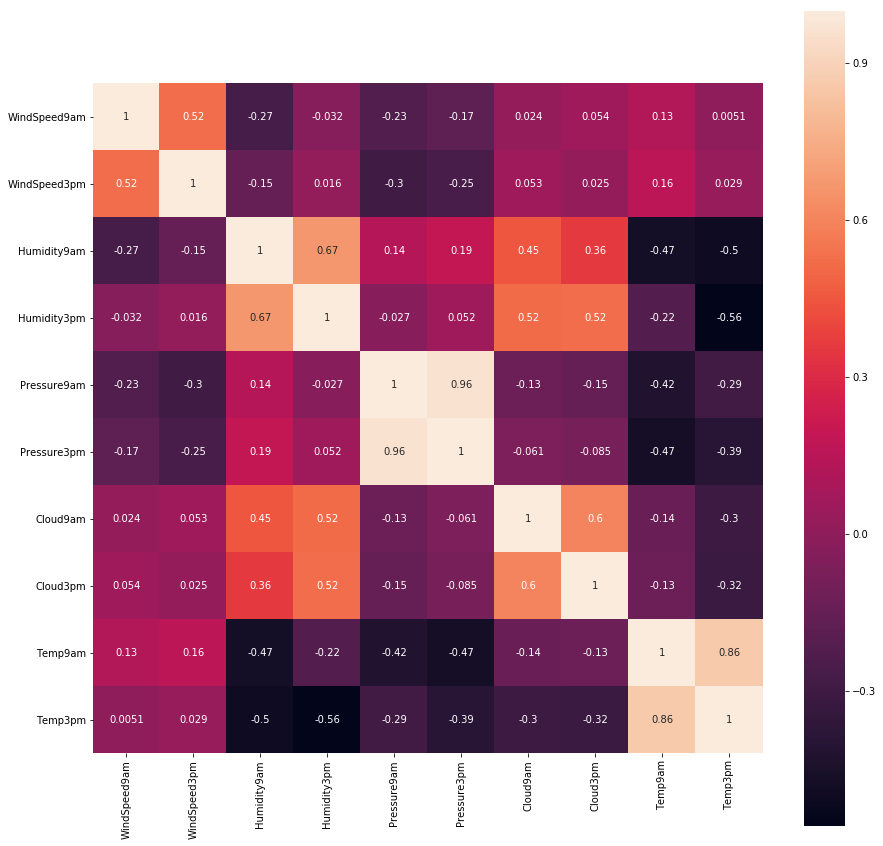

In [2]:
#To see the interaction between different factors of different time in a day.
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline
plt.figure(figsize = (15,15))

foo = sns.heatmap(pd_data.drop(['Date','Location', 'MinTemp', 'MaxTemp', 'Rainfall','Evaporation', 'Sunshine',
                                'WindGustDir', 'WindGustSpeed','WindDir9am','WindDir3pm','RainToday','RISK_MM',
                                'RainTomorrow'], axis = 1).corr(), square = True, annot=True)

# 2. The interaction among temperature, rainfall, evaporation, sunshine and RISK_MM. (RISK_MM gets greater means higher raining opportunity)

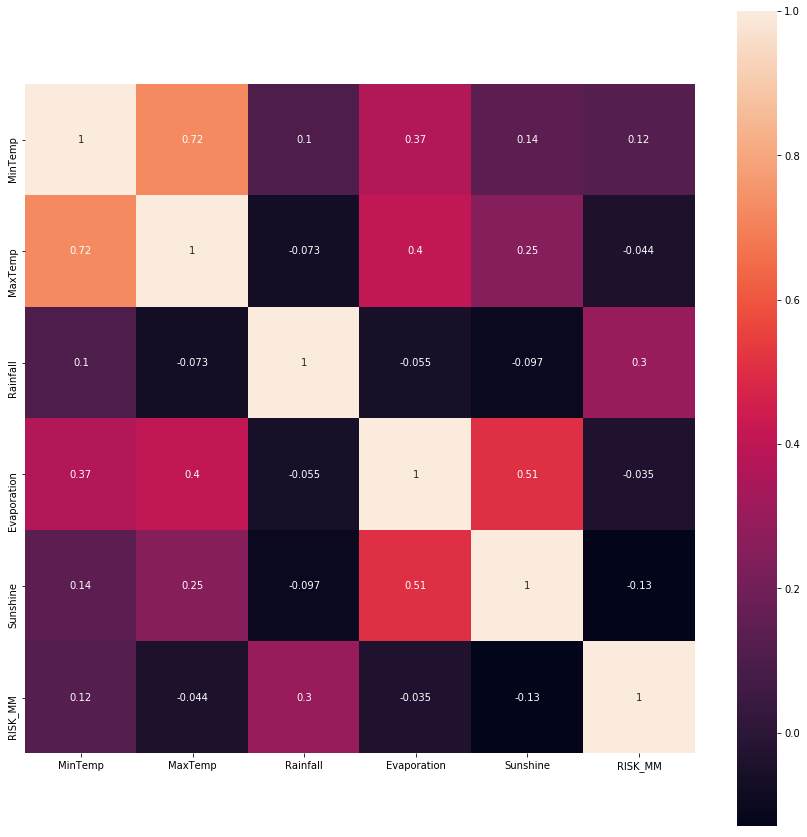

In [3]:
#The factors may affect the opportunity of raining(RISK_MM gets greater means higher opportunity)
test_data = pd_data.drop(['Date','Location','WindGustDir', 'WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am',
                          'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm',
                          'Temp9am','Temp3pm','RainToday','RainTomorrow'], axis = 1)
test_data.fillna(0, inplace=True)
plt.figure(figsize = (15,15))
foo2 = sns.heatmap(test_data.corr(), square = True, annot=True)

# 3. The observation data that a station distributes.(Divided into 3 parts)

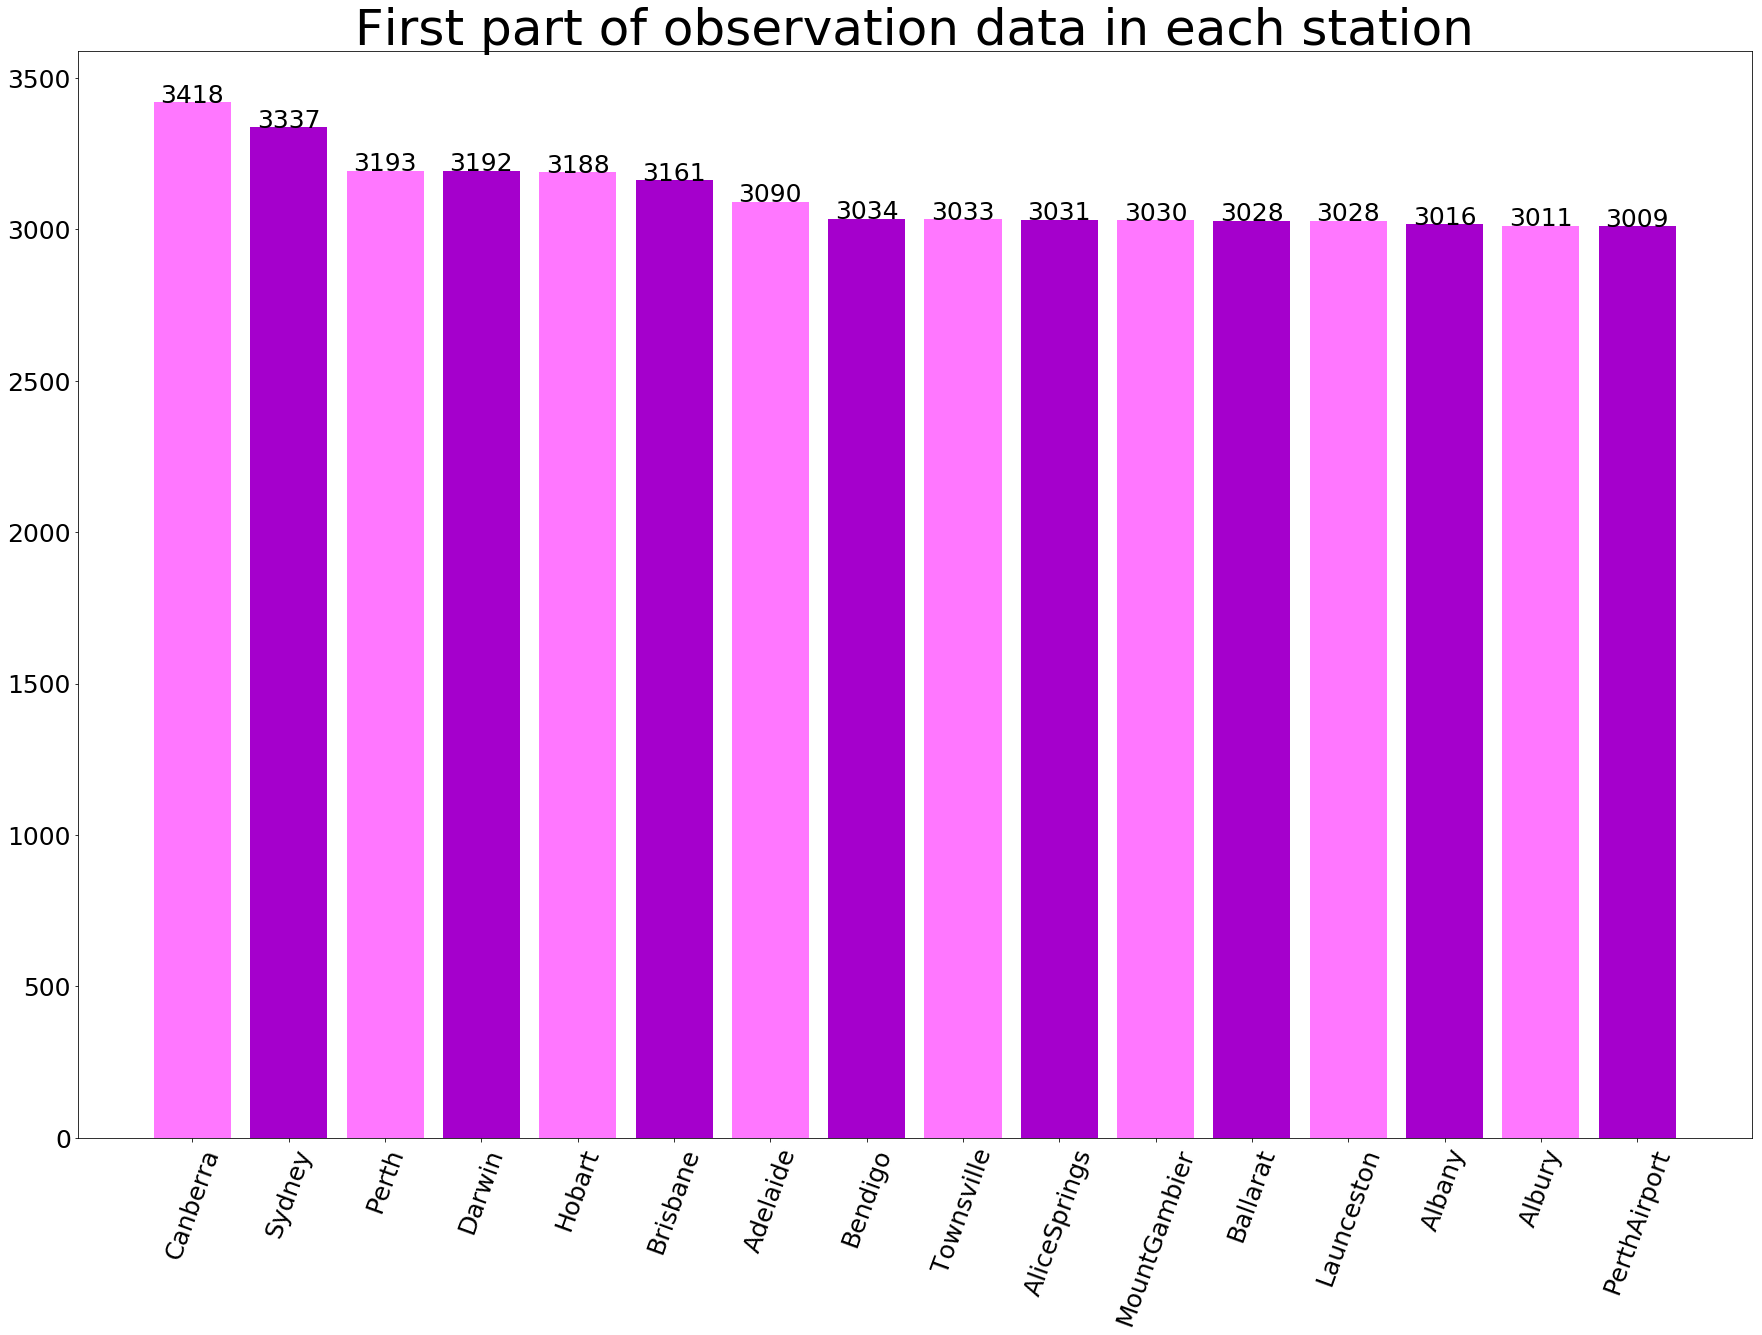

In [4]:
#Count how many observation data that a station distributes.
stationname = pd_data['Location'].value_counts().keys().tolist()
datanumber = pd_data['Location'].value_counts().tolist()
n = len(stationname)
m = len(datanumber)
namepart1 = stationname[0:int(n/3)]
namepart2 = stationname[int(n/3):int(2*n/3)]
namepart3 = stationname[int(2*n/3):n]
numberpart1 = datanumber[0:int(m/3)]
numberpart2 = datanumber[int(m/3):int(2*m/3)]
numberpart3 = datanumber[int(2*m/3):m]

plt.figure(figsize = (30,20))
plt.title('First part of observation data in each station',fontsize = 50)
plt.bar(namepart1, numberpart1, color=['#FF77FF','#A500CC'])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25,rotation=70)
for a,b in zip(namepart1, numberpart1):
    plt.text(a, b, str(b),ha='center',fontsize=25)



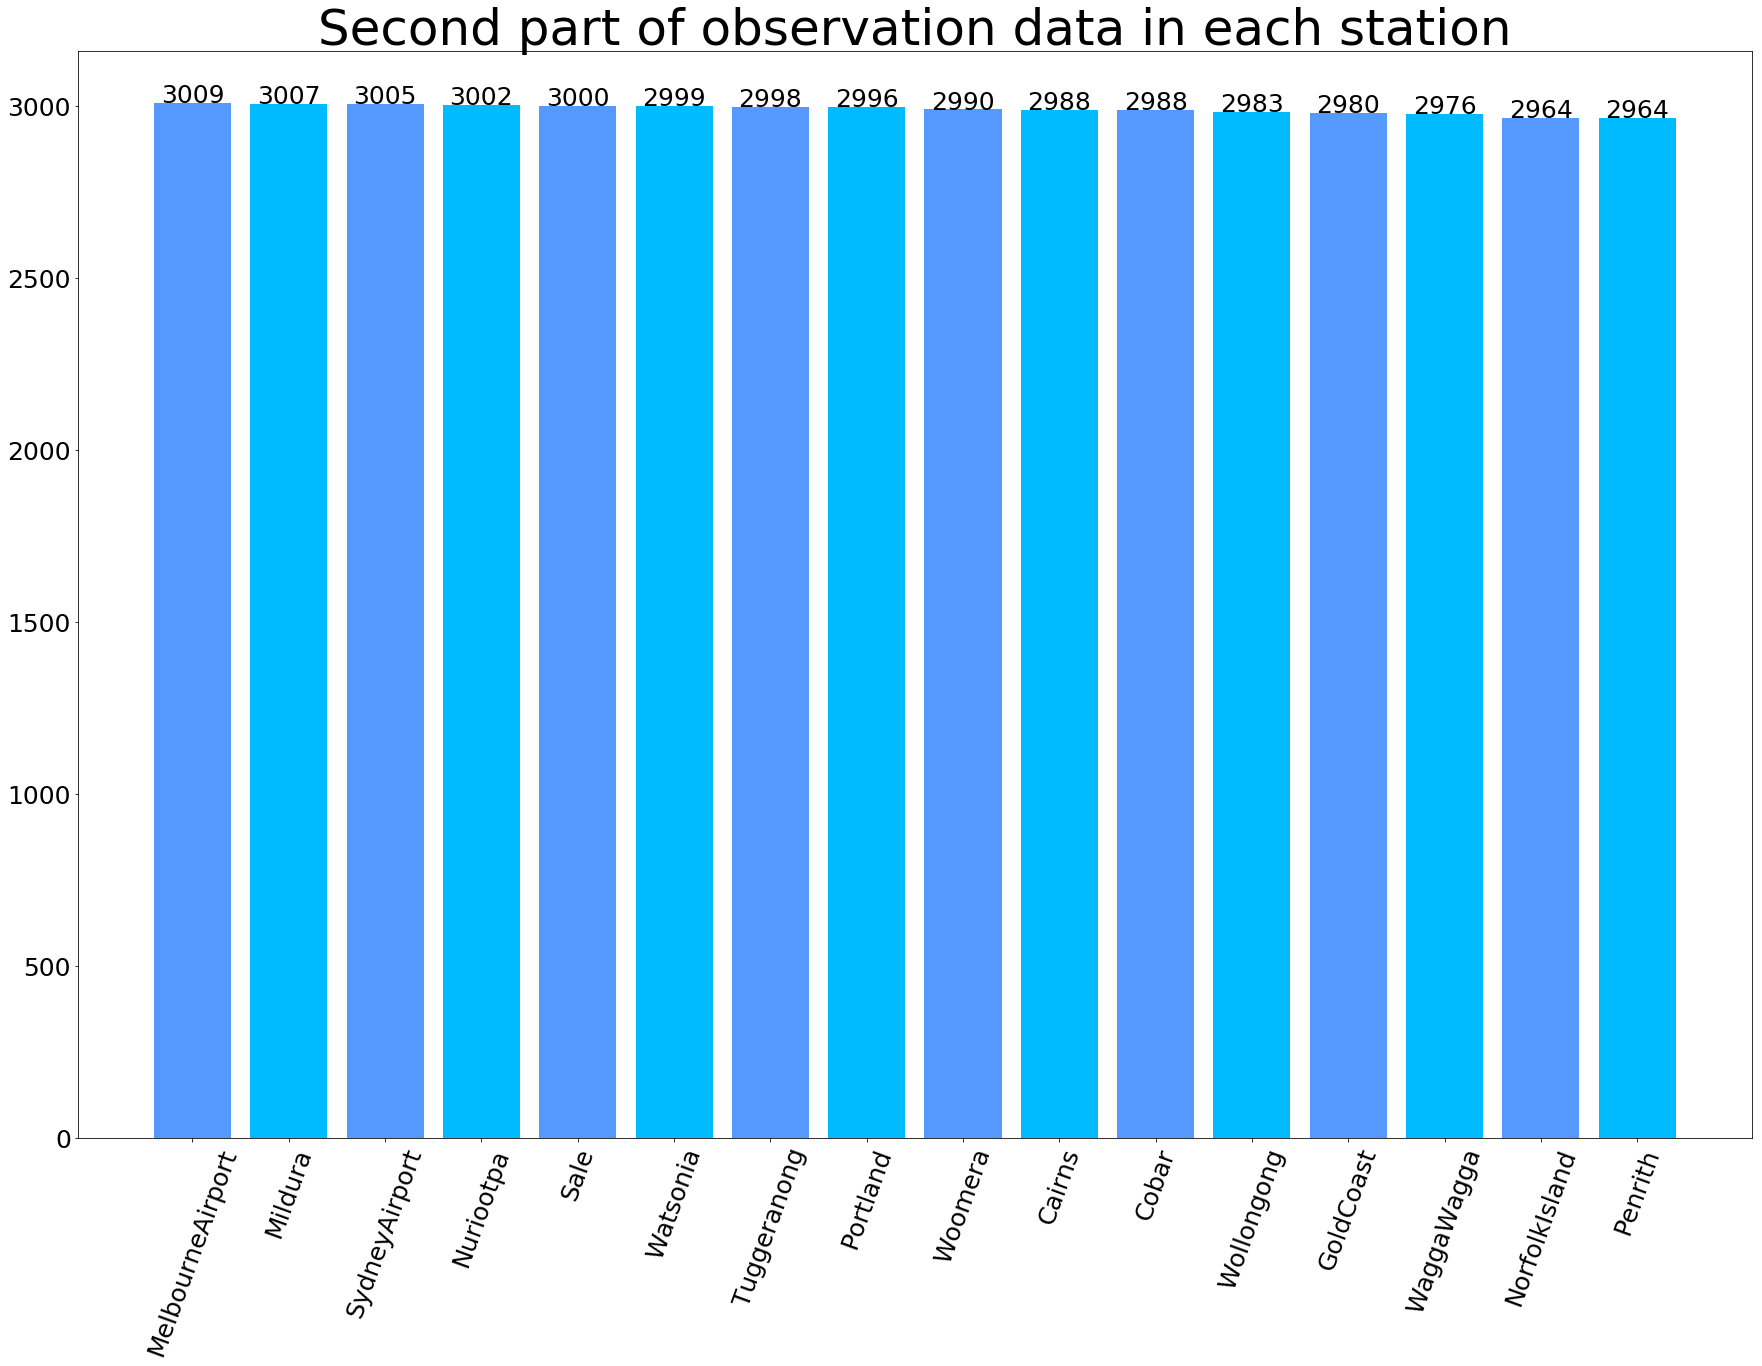

In [5]:
plt.figure(figsize = (30,20))
plt.title('Second part of observation data in each station',fontsize = 50)
plt.bar(namepart2, numberpart2, color=['#5599FF','#00BBFF'])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25,rotation=70)
for a,b in zip(namepart2, numberpart2):
    plt.text(a, b, str(b),ha='center',fontsize=25)


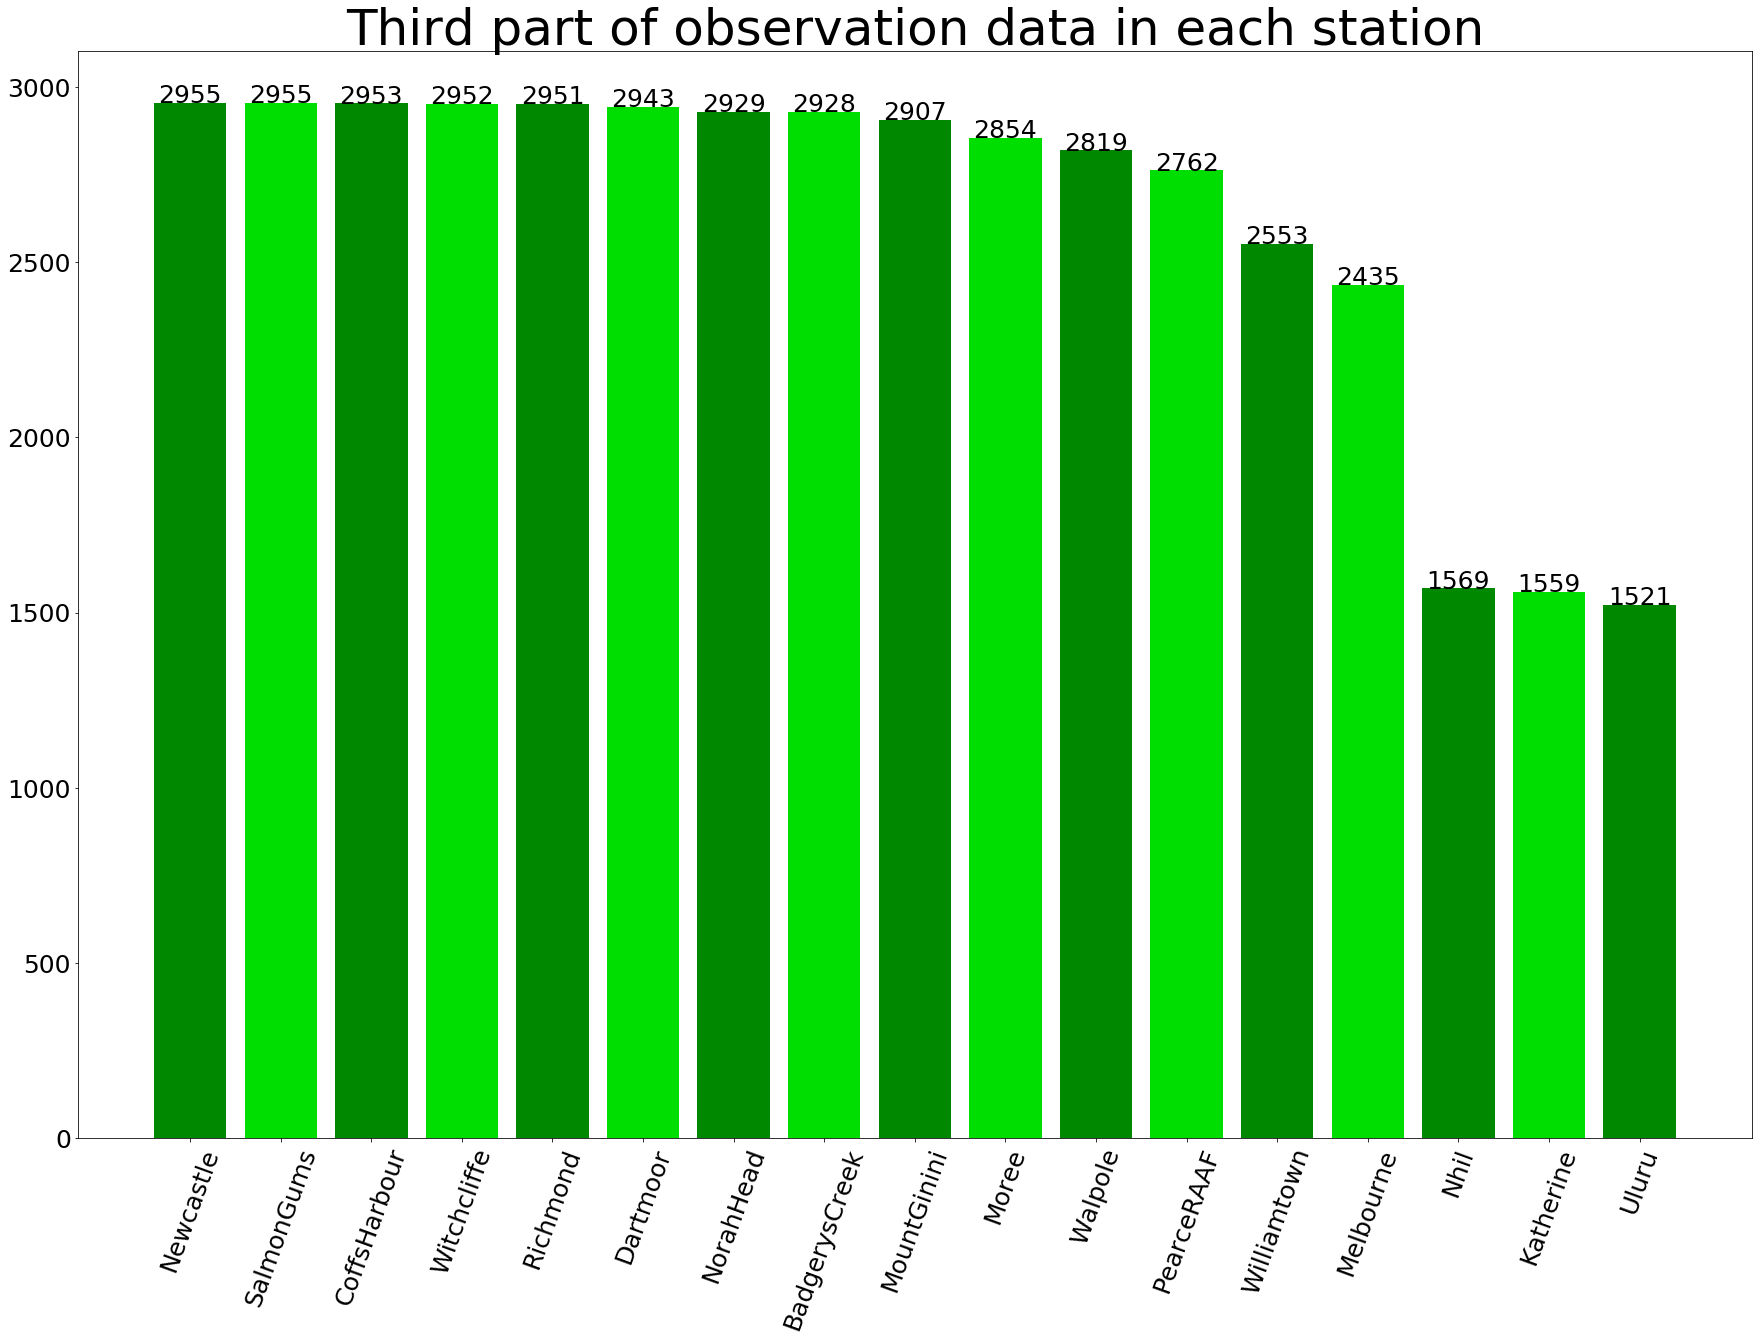

In [6]:
plt.figure(figsize = (30,20))
plt.title('Third part of observation data in each station',fontsize = 50)
plt.bar(namepart3, numberpart3, color=['#008800','#00DD00'])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25,rotation=70)
for a,b in zip(namepart3, numberpart3):
    plt.text(a, b, str(b),ha='center',fontsize=25)

# 4. The number of observation data in each year

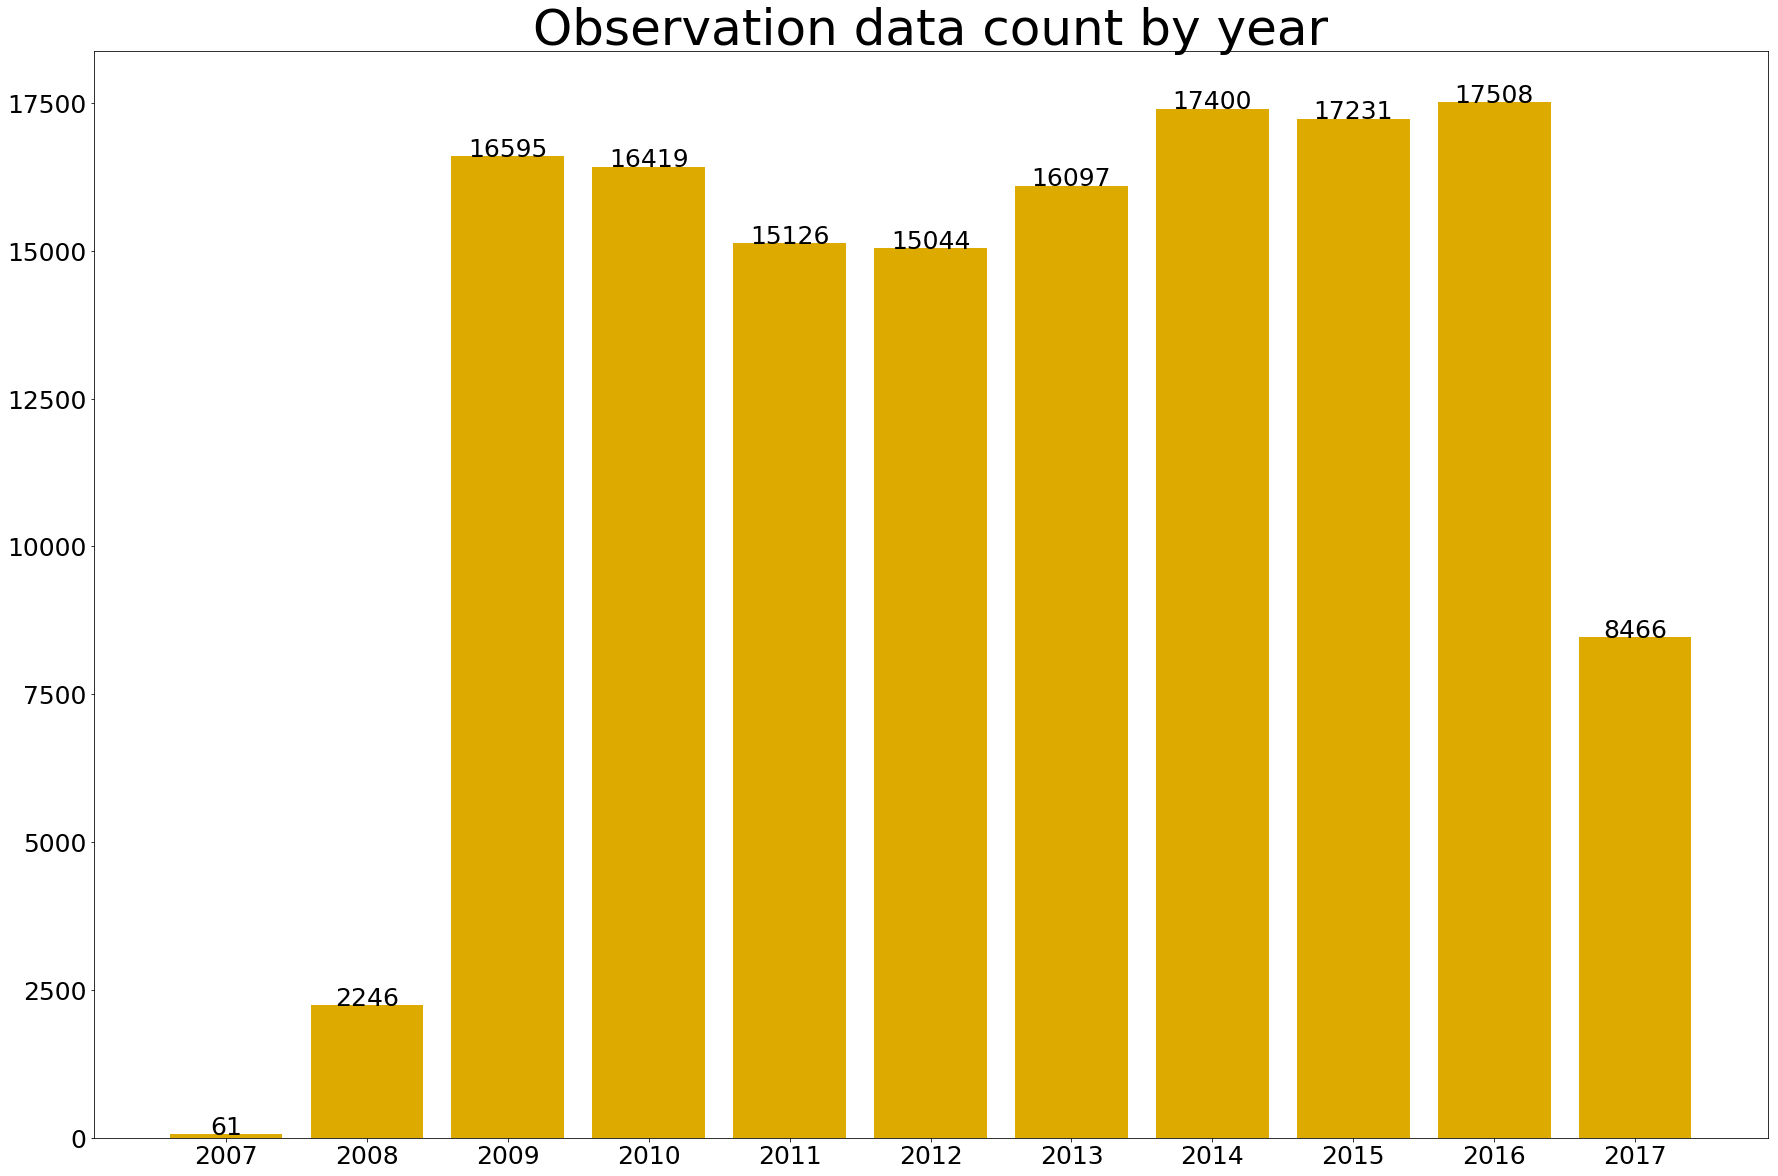

In [7]:
#Count how many observation data is observed in a year
from collections import Counter
year = []
for i in range(pd_data.shape[0]):
    curtime = pd_data.loc[i,'Date']
    year.append(curtime[:4])
    
yearcollec = Counter(year)
yearcollecdict = dict(yearcollec)
sortkey = sorted(yearcollecdict.keys())
year_X_axis = []
year_Y_axis = []
for key in sortkey:
    year_X_axis.append(key)
    year_Y_axis.append(yearcollecdict[key])
    
plt.figure(figsize = (30,20))
plt.title('Observation data count by year',fontsize = 50)
plt.bar(year_X_axis,year_Y_axis,color='#DDAA00')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
for a,b in zip(year_X_axis, year_Y_axis):
    plt.text(a, b, str(b),ha='center',fontsize=25)



# 5. Max/Min temperature change in Albury station by month

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


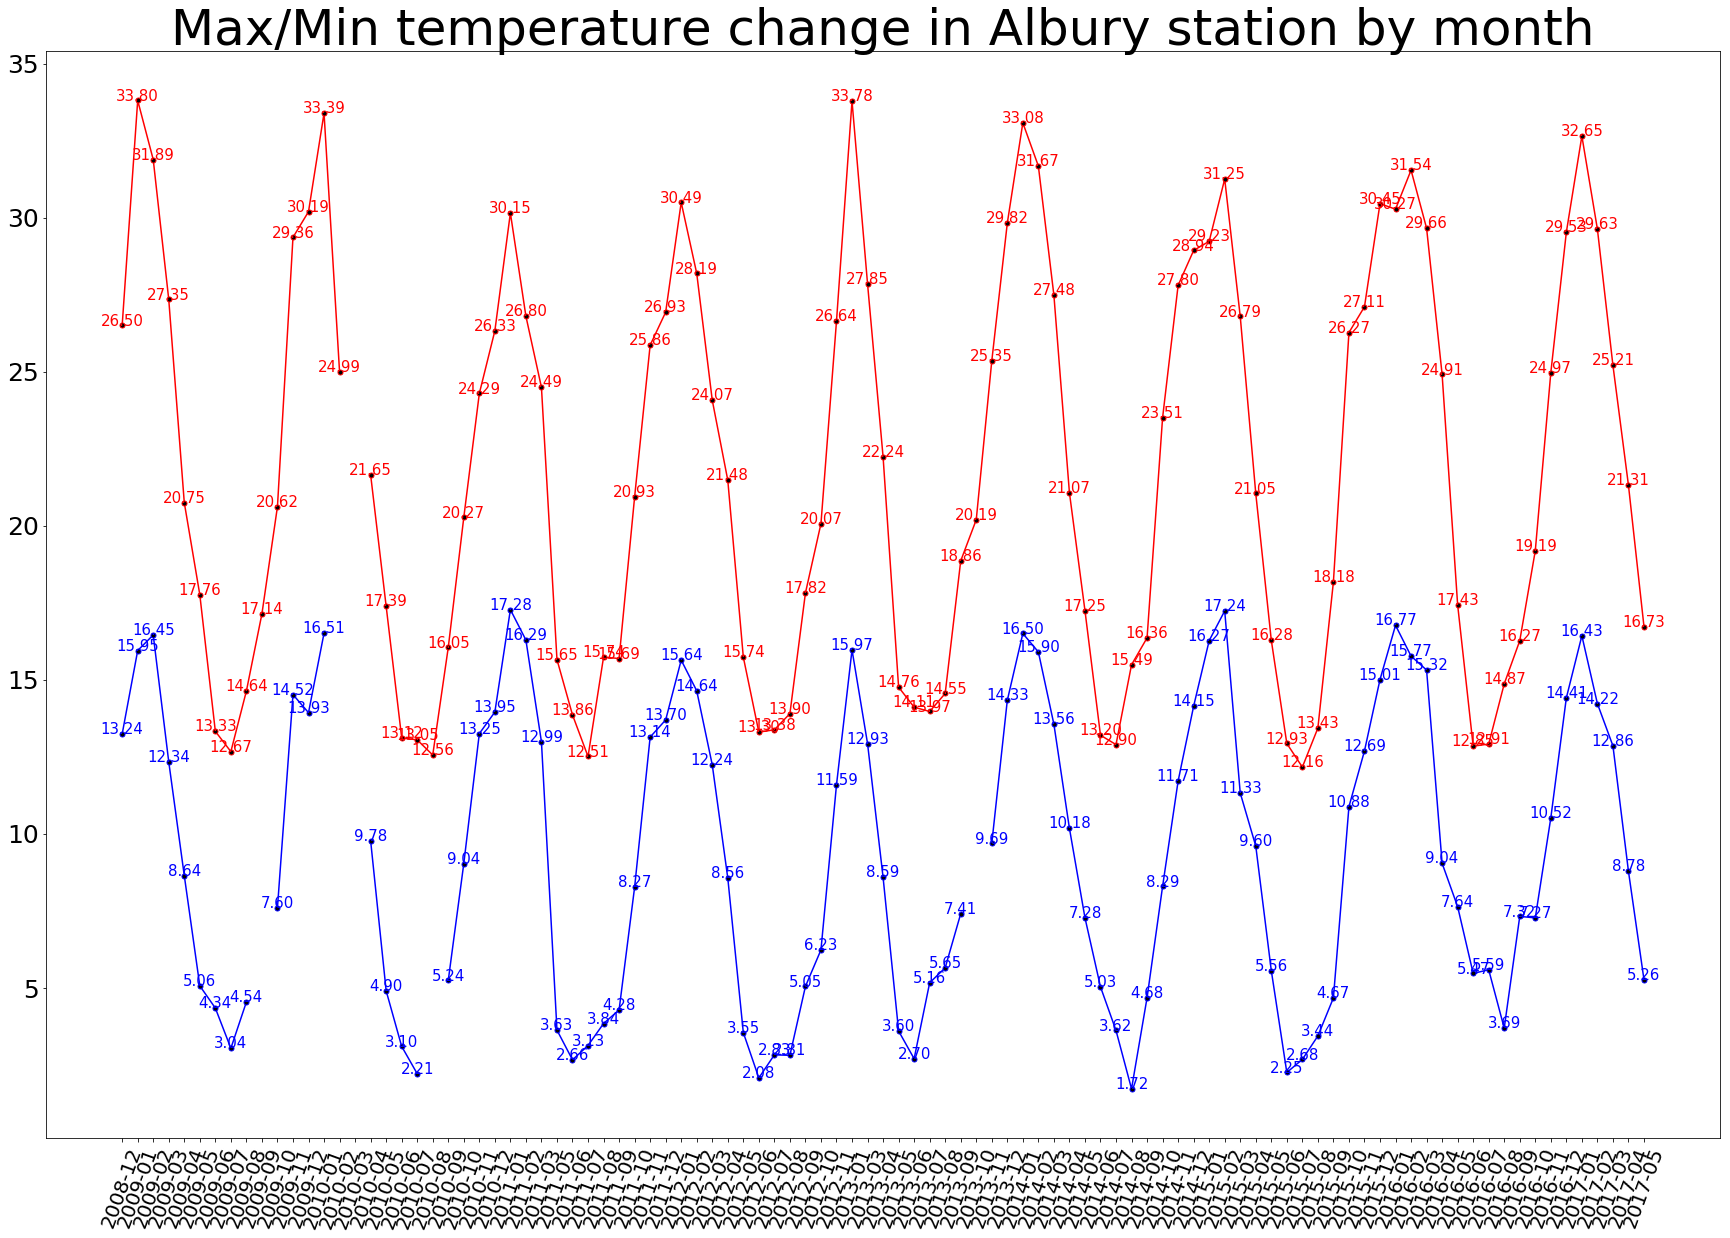

In [10]:
#Temperature change in Albury station
from decimal import  Decimal
mintemp = []
maxtemp = []
date = []
for i in range(pd_data.shape[0]):
    if pd_data.loc[i,'Location'] == 'Albury':
        tmp = pd_data.loc[i,'MinTemp']
        mintemp.append(tmp)
        tmp = pd_data.loc[i,'MaxTemp']
        maxtemp.append(tmp)
        tmp = pd_data.loc[i,'Date']
        date.append(tmp)
    else:
        break;
tempdict = {}
for i in range(len(date)):
    tempdict[i] = [date[i],mintemp[i],maxtemp[i]]

curdate = tempdict[0][0]
minavg = []
maxavg = []
yearmonth = []
accmax = 0
accmin = 0


for i in range(len(tempdict)):
    tmpdate = tempdict[i][0]
    if tmpdate[:7] != curdate[:7]:
        curdate = tmpdate
        minavg.append(accmin / int(tempdict[i-1][0][8:10]))
        accmin = 0
        maxavg.append(accmax / int(tempdict[i-1][0][8:10]))
        accmax = 0
        yearmonth.append(tempdict[i-1][0][:7])
        
    else:
        accmax = accmax + tempdict[i][2]
        accmin = accmin + tempdict[i][1]
        
plt.figure(figsize = (30,20))
plt.title('Max/Min temperature change in Albury station by month',fontsize = 50)




plt.plot(yearmonth,maxavg, label="max temperature", color='r',marker='o',markerfacecolor='black', markersize=5)
for a,b in zip(yearmonth, maxavg):
    plt.text(a, b, Decimal(str(b)).quantize(Decimal('0.00')),
             ha='center',fontsize=15,color='r')
    

plt.plot(yearmonth,minavg, label="min temperature", color='b',marker='o',markerfacecolor='black', markersize=5)
for a,b in zip(yearmonth, minavg):
    plt.text(a, b,  Decimal(str(b)).quantize(Decimal('0.00')),
             ha='center',fontsize=15,color='b')
plt.yticks(fontsize=25)
plt.xticks(fontsize=20,rotation=70)

plt.show()
